In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table(r'C:\Users\Temitope Babatunde\Documents\My Repository\Tutorial Dataset\Insurance dataset.txt')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  14604 non-null  float64
 1   Sex                  15000 non-null  object 
 2   Weight               15000 non-null  int64  
 3   Bmi                  14044 non-null  float64
 4   Hereditary_diseases  15000 non-null  object 
 5   No_of_dependents     15000 non-null  int64  
 6   Smoker               15000 non-null  int64  
 7   City                 15000 non-null  object 
 8   Bloodpressure        15000 non-null  int64  
 9   Diabetes             15000 non-null  int64  
 10  Regular_ex           15000 non-null  int64  
 11  Job_title            15000 non-null  object 
 12  Claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13648 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  13648 non-null  float64
 1   Sex                  13648 non-null  object 
 2   Weight               13648 non-null  int64  
 3   Bmi                  13648 non-null  float64
 4   Hereditary_diseases  13648 non-null  object 
 5   No_of_dependents     13648 non-null  int64  
 6   Smoker               13648 non-null  int64  
 7   City                 13648 non-null  object 
 8   Bloodpressure        13648 non-null  int64  
 9   Diabetes             13648 non-null  int64  
 10  Regular_ex           13648 non-null  int64  
 11  Job_title            13648 non-null  object 
 12  Claim                13648 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
df['Age'] = df['Age'].astype(int)

In [7]:
df.head()

,Age,Sex,Weight,Bmi,Hereditary_diseases,No_of_dependents,Smoker,City,Bloodpressure,Diabetes,Regular_ex,Job_title,Claim
0,60,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [8]:
Total_Claim = df['Claim'].sum()
Gender = df['Sex'].value_counts()
Weight = df['Weight'].mean()
BMI = df['Bmi'].mean()
print('*Dataset Descriptives*')
print('Total Claim is:', Total_Claim)
print('Male Population:', Gender[1])
print('Female Population:', Gender[0])
print('min age:', df['Age'].min())
print('max age:', df['Age'].max())
print('Average Weight:', Weight)
print('Average BMI:', BMI)

*Dataset Descriptives*
Total Claim is: 183107915.0
Male Population: 6648
Female Population: 7000
min age: 18
max age: 64
Average Weight: 64.68947831184056
Average BMI: 30.287294841735054


Mid Adults      2975
Adults          2798
Early Adults    2653
Youth           2640
Teens           1210
Ederly           675
Name: Age, dtype: int64


<Axes: >

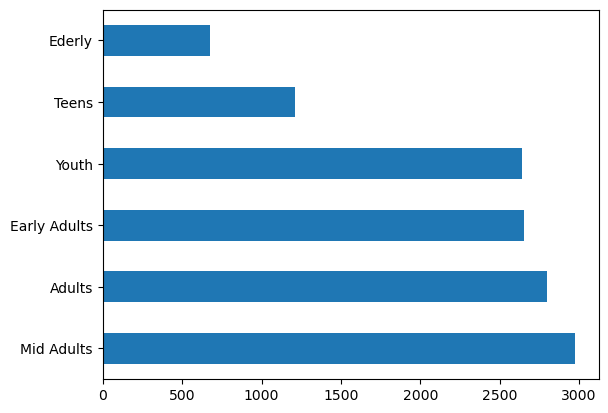

In [9]:
age_bracket = (18,21,31,41,51,61,64)
age = df['Age']
age_group = pd.cut(age, age_bracket, labels=['Teens', 'Youth', 'Early Adults','Mid Adults', 'Adults', 'Ederly'])
print(age_group.value_counts())
age_group.value_counts().plot(kind='barh')

In [10]:
City = df['City'].value_counts()
City[:10]

Nashville     276
Memphis       273
NewOrleans    269
Charlotte     268
Charleston    264
Brimingham    262
Louisville    261
Harrisburg    259
Stamford      255
Newport       255
Name: City, dtype: int64

In [11]:
Job = df['Job_title'].value_counts()
Job[:10]

Student         1153
HomeMakers       916
Singer           677
FilmMaker        670
Actor            648
HouseKeeper      625
Dancer           621
Manager          585
Photographer     362
Beautician       353
Name: Job_title, dtype: int64

NoDisease       12761
Alzheimer         134
Diabetes          127
EyeDisease        121
Obesity           108
Cancer             96
HeartDisease       93
Arthritis          79
High BP            69
Epilepsy           60
Name: Hereditary_diseases, dtype: int64


<Axes: >

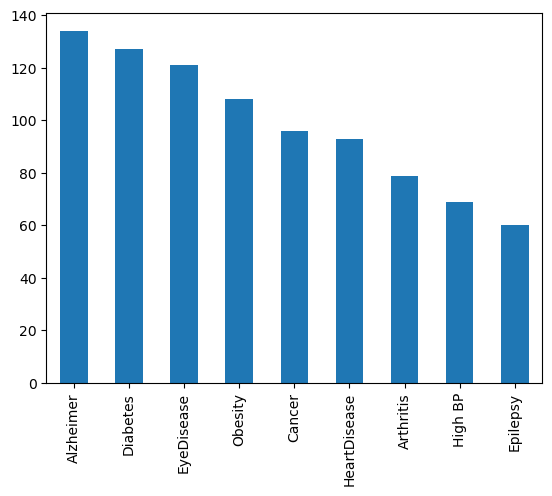

In [12]:
Hereditary_Diseases = df['Hereditary_diseases'].value_counts()
print(Hereditary_Diseases)
Hereditary_Diseases[1:].plot(kind='bar')

Have Diabetes: 10688
Does not have Diabetes: 2960


<Axes: ylabel='Diabetes'>

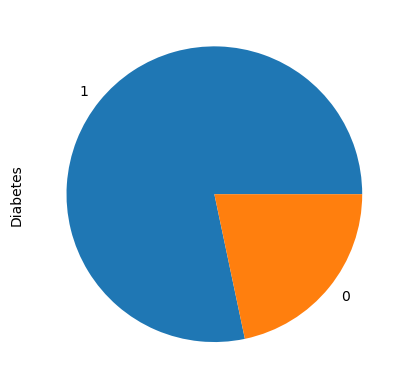

In [13]:
Diabetes = df['Diabetes'].value_counts()
print('Have Diabetes:', Diabetes[1])
print('Does not have Diabetes:', Diabetes[0])
Diabetes.plot(kind='pie')

Smokes: 2704
Does not Smoke: 10944


<Axes: ylabel='Smoker'>

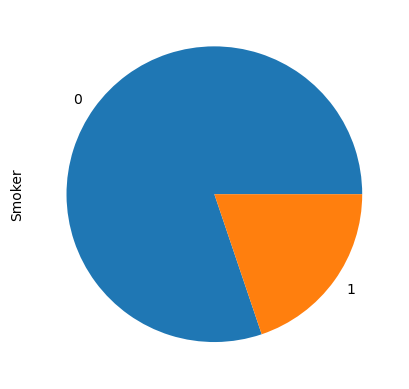

In [14]:
Smokers = df['Smoker'].value_counts()
print('Smokes:', Smokers[1])
print('Does not Smoke:', Smokers[0])
Smokers.plot(kind='pie')

Mid Adults      218
Youth           187
Early Adults    133
Adults           94
Ederly           55
Teens            23
Name: Age, dtype: int64


<Axes: >

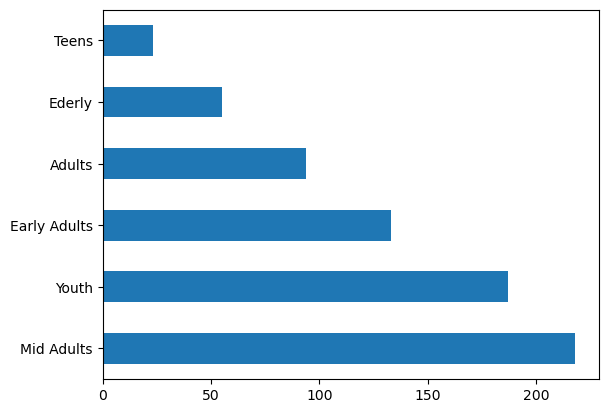

In [15]:
Death_row = df[(df.Smoker == 1) & (df.Diabetes == 1) & (df.Hereditary_diseases != 'NoDisease')]
Death_row
age_bracket = (18,21,31,41,51,61,64)
age_death_row = Death_row['Age']
age_group_death_row = pd.cut(age_death_row, age_bracket, labels=['Teens', 'Youth', 'Early Adults','Mid Adults', 'Adults', 'Ederly'])
print(age_group_death_row.value_counts())
age_group_death_row.value_counts().plot(kind="barh")